In [1]:
cd Measurement-automation//

/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.signal import savgol_filter

In [4]:
import matplotlib.patches as patches
from matplotlib import ticker, colorbar as clb

%cd .. 
# from parula import *
%cd Measurement-automation/

from importlib import reload
from resonator_tools.circuit import notch_port

import scipy
from scipy.signal import correlate, find_peaks
from scipy.optimize import *

rc("font", **{"size":14})

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

%load_ext snakeviz

import lib2

from lib2.MeasurementResult import *

/home/gleb/Документы/Science/Статьи/Machine vision
/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [7]:
reload(lib2.ResonatorDetector)
reload(lib2.fulaut.AnticrossingOracle)
from lib2.fulaut.AnticrossingOracle import AnticrossingOracle

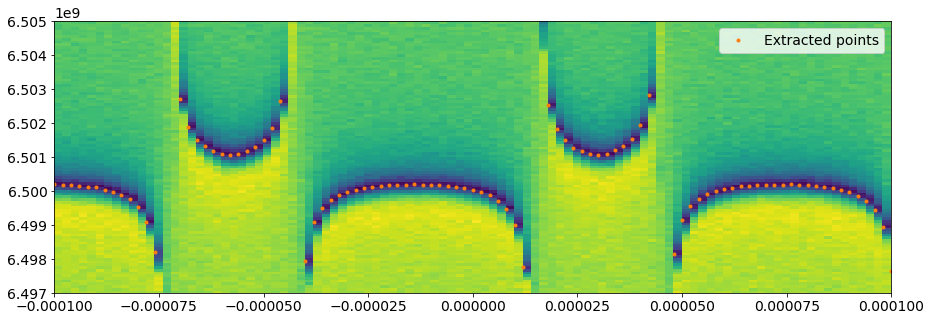

In [8]:
anti0 = MeasurementResult.load("BMSTU Clean 3", "I-anticrossing")
ao0 = AnticrossingOracle("transmon", anti0, plot=True, fast_res_detect=False, hints=[])

In [10]:
anti1 = MeasurementResult.load("BMSTU Clean 3", "VI-anticrossing")
data_dict = anti1.get_data()
S21s = data_dict["data"]
# data_dict["data"] = data_dict["data"]*exp(2j*pi*65e-9*freqs) +\
#         1e-2*(random.normal(size = data_dict["data"].shape)\
#                         +1j*random.normal(size = data_dict["data"].shape))
# # data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)

data_dict["data"] = (savgol_filter(real(S21s), 11, 3)\
                                + 1j*savgol_filter(imag(S21s), 11, 3))

# anti1.set_data(data_dict)

/home/gleb/py36/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [8]:
tts0 = MeasurementResult.load("BMSTU Clean 3", "I-two-tone")
tts1 = MeasurementResult.load("BMSTU Clean 3", "VI-two-tone")
tts2 = MeasurementResult.load("Xmon 2Q", "III-two-tone")


In [ ]:
params

In [ ]:
reload(lib2.fulaut.SpectrumOracle)
from lib2.fulaut.SpectrumOracle import *
params = result2[0][2:]
params[1] = 2.5e-5
so = SpectrumOracle("transmon", tts2, params, True)

In [ ]:
result0

In [ ]:
so.launch()

In [11]:
anti2 = MeasurementResult.load("Xmon 2Q", "III-anticrossing")
# data_dict = anti2.get_data()
# data_dict["data"] = data_dict["data"]+\
#         2e-2*(random.normal(size = data_dict["data"].shape)\
#                         +1j*random.normal(size = data_dict["data"].shape))
    
# data_dict["data"] = (savgol_filter(real(S21s), 21, 2)\
#                                 + 1j*savgol_filter(imag(S21s), 21, 2))
# data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)
# anti.set_data(data_dict)


In [10]:
anti1._data["Frequency [Hz]"] = anti1._data["frequency"]

AttributeError: 'FigureManagerBase' object has no attribute 'window'

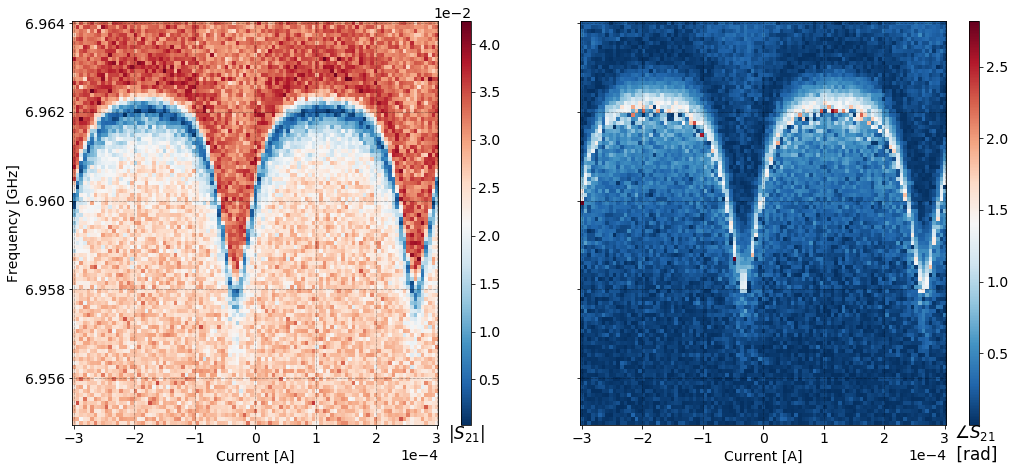

In [11]:
anti1.visualize()

/home/gleb/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


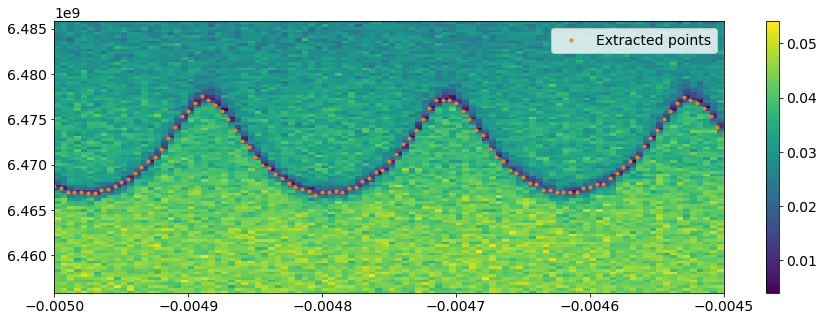

In [13]:
# ao = AnticrossingOracle("transmon", anti1, plot=True, hints=["fqmax_above"])
ao2 = AnticrossingOracle("transmon", anti2, plot=True, hints=[])
plt.colorbar()

In [22]:
ao._phase

0.3205706789377336

In [20]:
result1

(array([6.96305348e+09, 6.66237458e+07, 2.97521536e-04, 1.15760614e-04,
        1.12869728e+10, 4.79924403e-01]), 0.06035260781786038)

6.4710e+09, 3.8128e+07, 1.8001e-04, -1.1722e-04, 8.4997e+09, 4.0094e-01 loss: 3.01 MHz


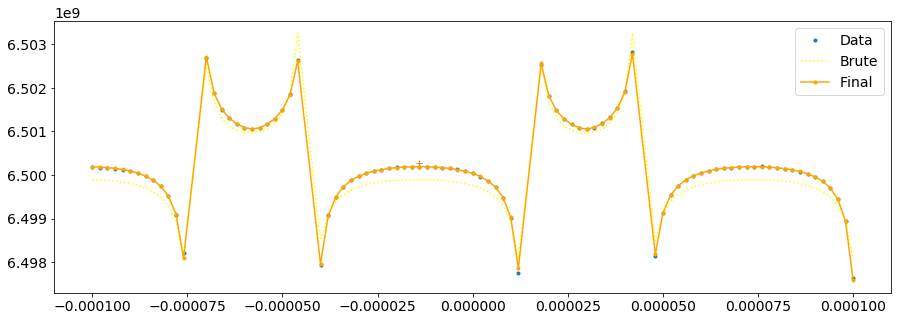

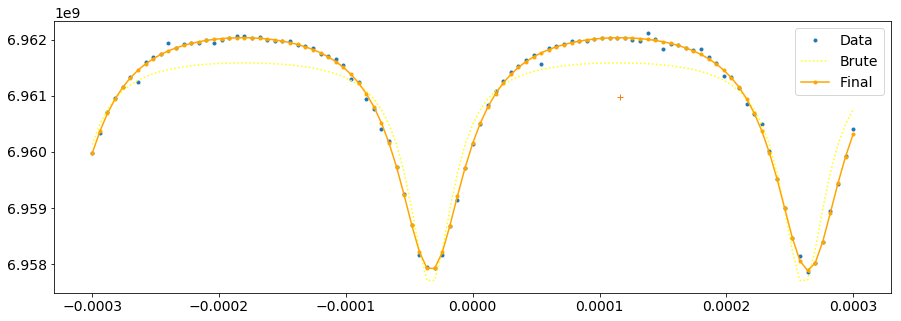

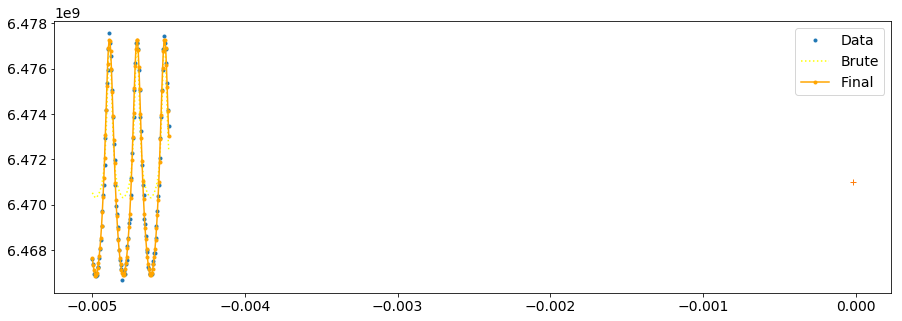

In [14]:
result0 = ao0.launch()
result1 = ao.launch()
result2 = ao2.launch()

In [33]:
result0, ao0._brute_opt_params, ao0._brute_loss

((array([ 6.5007e+09,  3.5823e+07,  8.7751e-05, -1.4049e-05,  8.9654e+09,  9.4542e-02]),
  0.020471174679275072),
 [6500278364.56764,
  24000000.0,
  8.8e-05,
  -1.4367346938775519e-05,
  8000000000.0,
  0.5],
 0.25126548711906593)

In [ ]:
test_params = result1[0].copy()
test_params[-1] *= 0.95

In [ ]:
ao.plot_model(test_params)
test_params-result1[0]

In [23]:
from numdifftools import Hessian, Jacobian, MinStepGenerator

In [25]:
np.set_printoptions(precision=4, linewidth=150, suppress=False)

In [44]:
oracle = ao2
result = result2[0].copy()
result[0] *= 1e-9
result[1] *= 1e-9
result[4] *= 1e-9
result[2] *= 1e4
result[3] *= 1e4

In [45]:
def func(x, curs, res_freqs): 
#     x = x.copy()
#     print(x)
    oracle._iteration_counter = 10
    freqs = oracle._freqs
    oracle._freqs = freqs/1e9
    loss = ((oracle._cost_function(x, curs*1e4, res_freqs/1e9)/len(curs)))/1e-6
    oracle._freqs = freqs
    return loss

In [46]:
def find_scales(ao, func, opt_params):
    
    scales = [6e-6, 1e-4, 3e-4, 2e-4, 4.5e-3, 5e-3]
    opt_loss = func(opt_params, ao._res_points[:,0], ao._res_points[:,1])
    
    for i in range(6):
        param_idx = i
        initial_scale = scales[param_idx]
        loss_delta = 0
        
        coarse_scale_found = False
        
        scale = scales[param_idx]
        
        while not coarse_scale_found:
            
            param_val = opt_params[param_idx]
            params = opt_params.copy()
            params[param_idx] = param_val-scale
            
            loss_delta = func(params, ao._res_points[:,0], ao._res_points[:,1]) - opt_loss
#             print(scale, param_val, loss_delta, opt_loss)

            if loss_delta > .105*opt_loss:
                scale = scale/1.005
            elif loss_delta < .095*opt_loss:
                scale = scale*1.005
            else:
                coarse_scale_found=True
        scales[param_idx] = scale
    return scales

In [47]:
scales = find_scales(oracle, func, result)
scales

[4.660179362813711e-05,
 0.00027938862598024614,
 0.00013847828695444714,
 0.003450255514135785,
 0.004849572319146366,
 0.022774705945763737]

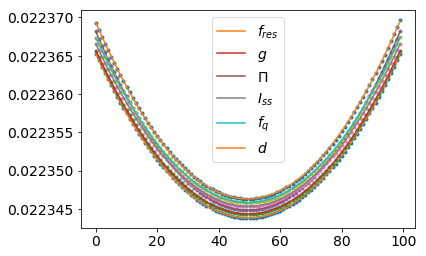

In [48]:
parabola = lambda x, A,B,C: A*(x-C)**2+B
names = ["$%s$"%s for s in "f_{res} g \Pi I_{ss} f_q d".split(" ")]
opt_params_arr = []

for param_idx in range(6):
    # scales = [6e3, 1e5, 3e-8, 2e-8, 4.5e6, 5e-3]
    param_vals = linspace(result[param_idx]-scales[param_idx]*1e-1, 
                      result[param_idx]+scales[param_idx]*1e-1, 100)
    losses = []
    for param_val in param_vals:
        params = result.copy()
        params[param_idx] = param_val
        losses.append(func(params, oracle._res_points[:,0], oracle._res_points[:,1]))
    plot(array(losses)+1e-4*param_idx/200, ".")
    opt_params, cov = curve_fit(parabola, param_vals, losses, p0=(5/scales[param_idx], losses[50], mean(param_vals)))
    opt_params_arr.append(opt_params)
    plot(parabola(param_vals, *opt_params)+1e-4*param_idx/200, label = names[param_idx])
plt.legend()    

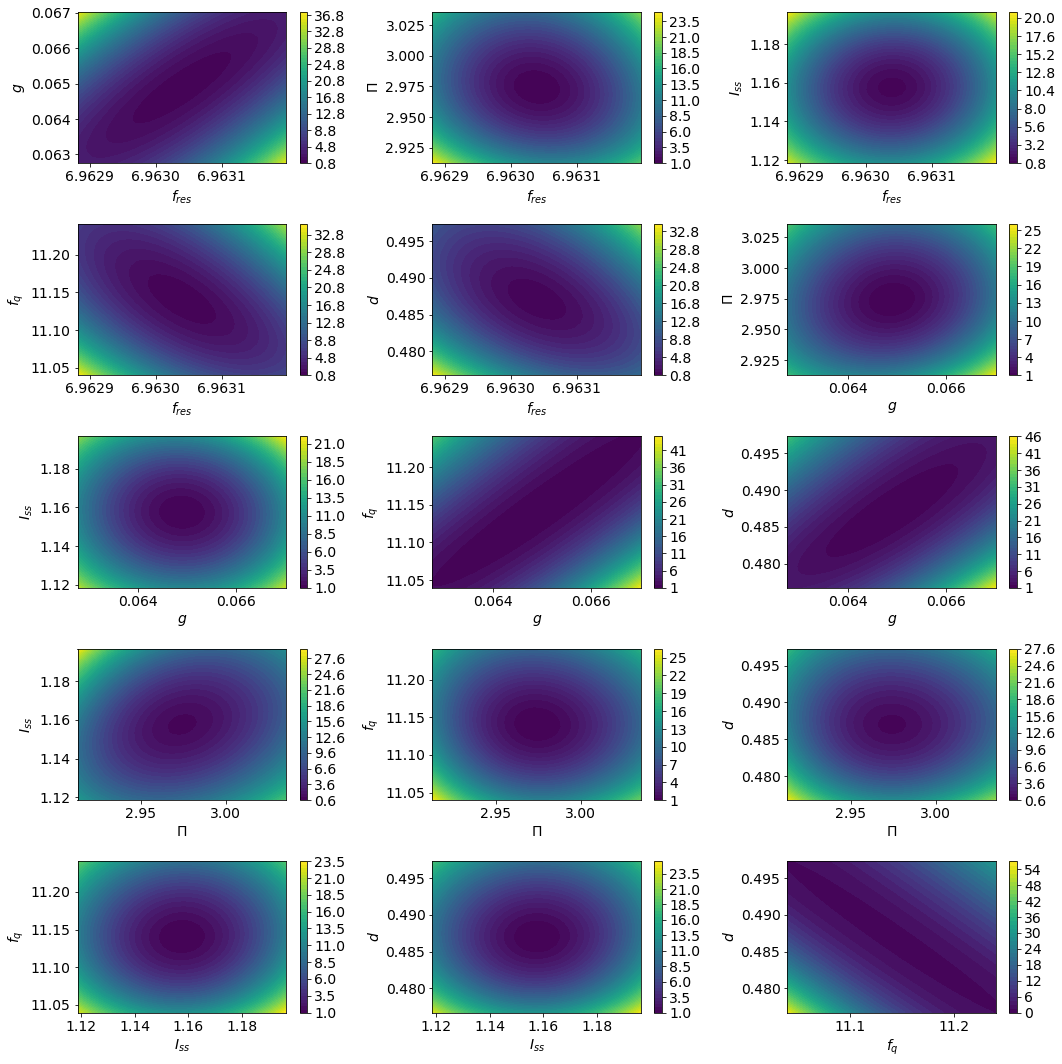

In [40]:
# scales = [6e3, 1e5, 3e-8, 2e-8, 4.5e6, 5e-3]
i=0
for param1_idx in range(5):
    for param2_idx in range(param1_idx+1, 6):
        param1_vals = linspace(result[param1_idx]-scales[param1_idx]*10, 
                          result[param1_idx]+scales[param1_idx]*10, 30)
        param2_vals = linspace(result[param2_idx]-scales[param2_idx]*10, 
                          result[param2_idx]+scales[param2_idx]*10, 30)
        losses = []
        for param1_val in param1_vals:
            row = []
            for param2_val in param2_vals:
                params = result.copy()
                params[param1_idx] = param1_val
                params[param2_idx] = param2_val

                row.append(func(params, oracle._res_points[:,0], oracle._res_points[:,1])/oracle._loss**2)
            losses.append(row) 
            
        i+=1
        plt.subplot(5, 3, i)
        contourf(param1_vals, param2_vals, array(losses).T, 50)
        plt.xlabel(names[param1_idx])
        plt.ylabel(names[param2_idx])
        colorbar()
plt.gcf().set_size_inches(15,15)
plt.tight_layout()

In [21]:
array(opt_params_arr)[:,0]*2

array([1.99633677e+06, 7.31507734e+03, 1.00785528e+03, 1.65289615e+03,
       3.33490281e+00, 3.46504678e+00])

In [718]:
array(opt_params_arr)[:,0]*2

array([1.9954e+06, 9.1504e+03, 1.3228e+01, 3.3267e+01, 3.0608e+00, 4.0764e+02])

In [49]:
array(opt_params_arr)[:,0]*2

array([1.9725e+06, 5.4680e+04, 2.4351e+05, 3.5687e+02, 1.8328e+02, 8.9201e+00])

In [26]:
H = Hessian(func, step=1e-2*array(scales), order=10)
hess = H(result, oracle._res_points[:,0], oracle._res_points[:,1])
hess_diag = sqrt(diag(hess))
hess, 1/hess_diag
# h1 = diag(hess_diag**-1).dot(hess).dot(diag(hess_diag**-1))
# h1

(array([[ 1.9963e+06, -4.8254e+04,  1.4220e+03,  4.6091e+03,  1.4222e+03,  1.4771e+03],
        [-4.8254e+04,  7.3151e+03, -6.6682e+02, -7.0813e+02, -9.3909e+01, -1.6345e+01],
        [ 1.4220e+03, -6.6682e+02,  1.0079e+03,  4.9260e+02,  1.5415e+01,  9.2040e+00],
        [ 4.6091e+03, -7.0813e+02,  4.9260e+02,  1.6529e+03,  2.0893e+01,  1.5471e+01],
        [ 1.4222e+03, -9.3909e+01,  1.5415e+01,  2.0893e+01,  3.3349e+00,  2.8422e+00],
        [ 1.4771e+03, -1.6345e+01,  9.2040e+00,  1.5471e+01,  2.8422e+00,  3.4650e+00]]),
 array([0.0007, 0.0117, 0.0315, 0.0246, 0.5476, 0.5372]))

In [719]:
H = Hessian(func, step=1e-2*array(scales), order=10)
hess = H(result, oracle._res_points[:,0], oracle._res_points[:,1])
hess_diag = sqrt(diag(hess))
hess
# h1 = diag(hess_diag**-1).dot(hess).dot(diag(hess_diag**-1))
# h1

array([[ 1.9954e+06, -1.1687e+05,  6.8156e+02, -2.4277e+02,  1.6984e+03,  1.4478e+04],
       [-1.1687e+05,  9.1504e+03, -3.5778e+01,  1.9922e+01, -1.5971e+02, -1.6514e+03],
       [ 6.8156e+02, -3.5778e+01,  1.3228e+01, -5.2068e+00,  3.5902e-01,  9.1099e-01],
       [-2.4277e+02,  1.9922e+01, -5.2068e+00,  3.3267e+01, -2.9337e-01, -2.2767e+00],
       [ 1.6984e+03, -1.5971e+02,  3.5902e-01, -2.9337e-01,  3.0608e+00,  3.4282e+01],
       [ 1.4478e+04, -1.6514e+03,  9.1099e-01, -2.2767e+00,  3.4282e+01,  4.0764e+02]])

In [50]:
H = Hessian(func, step=1e-2*array(scales), order=10)
hess = H(result, oracle._res_points[:,0], oracle._res_points[:,1])
hess_diag = sqrt(diag(hess))
hess
# h1 = diag(hess_diag**-1).dot(hess).dot(diag(hess_diag**-1))
# h1

array([[ 1.9725e+06,  2.8392e+05,  4.9863e+04, -1.8653e+03,  1.2958e+04,  3.7497e+03],
       [ 2.8392e+05,  5.4680e+04,  6.3459e+03, -2.3346e+02,  3.0069e+03,  3.8896e+02],
       [ 4.9863e+04,  6.3459e+03,  2.4351e+05, -9.3178e+03,  1.9186e+02,  1.0353e+02],
       [-1.8653e+03, -2.3346e+02, -9.3178e+03,  3.5687e+02, -6.8445e+00, -3.9102e+00],
       [ 1.2958e+04,  3.0069e+03,  1.9186e+02, -6.8445e+00,  1.8328e+02,  1.2067e+01],
       [ 3.7497e+03,  3.8896e+02,  1.0353e+02, -3.9102e+00,  1.2067e+01,  8.9199e+00]])

In [27]:
oracle._loss, 1/hess_diag, sqrt(diag(inv(hess))), oracle._loss*sqrt(diag(inv(hess))), eigh(hess)

(0.020471174679275072,
 array([0.0007, 0.0117, 0.0315, 0.0246, 0.5476, 0.5372]),
 array([1.3575e-03, 5.5422e-02, 3.5246e-02, 2.7214e-02, 4.3241e+00, 3.7694e+00]),
 array([2.7789e-05, 1.1346e-03, 7.2153e-04, 5.5710e-04, 8.8519e-02, 7.7164e-02]),
 (array([3.0636e-02, 3.7337e+00, 7.2599e+02, 1.7554e+03, 6.3137e+03, 1.9975e+06]),
  array([[-1.7527e-04,  9.4740e-04,  1.7273e-03, -2.0335e-03, -2.4217e-02,  9.9970e-01],
         [-9.4173e-03, -2.0991e-03,  5.5812e-02, -1.8175e-01, -9.8141e-01, -2.4239e-02],
         [-4.2442e-04,  9.8938e-03,  8.9532e-01, -4.2599e-01,  1.2977e-01,  7.2068e-04],
         [-2.4402e-05,  8.8865e-03, -4.4189e-01, -8.8620e-01,  1.3891e-01,  2.3174e-03],
         [-7.5452e-01, -6.5617e-01,  2.4851e-03, -6.2409e-03,  9.9230e-03,  7.1295e-04],
         [ 6.5621e-01, -7.5449e-01,  4.2215e-03, -1.0093e-02, -2.5921e-03,  7.3945e-04]])))

In [42]:
ao._loss, sqrt(diag(hess)**-1), sqrt(diag(inv(hess))), ao._loss*sqrt(diag(inv(hess))), eigh(hess)

(0.051257230791342985,
 array([0.0007, 0.0095, 0.2766, 0.1744, 0.4508, 0.0443]),
 array([2.2882e-02, 2.1692e+00, 2.9263e-01, 1.8022e-01, 1.8843e+02, 1.0117e+01]),
 array([1.1728e-03, 1.1119e-01, 1.4999e-02, 9.2374e-03, 9.6586e+00, 5.1857e-01]),
 (array([2.8078e-05, 1.1249e+01, 2.4173e+01, 3.4509e+01, 3.3077e+03, 2.0027e+06]),
  array([[-1.2022e-04, -1.9109e-03,  1.2640e-02, -2.9835e-03,  6.2599e-02,  9.9795e-01],
         [-1.1488e-02, -5.6615e-02,  3.1560e-01, -7.0550e-02,  9.4237e-01, -6.3431e-02],
         [-1.7124e-04, -9.6175e-01, -1.2335e-01,  2.4459e-01,  1.8611e-03,  3.3517e-04],
         [-5.7277e-05, -2.0765e-01, -2.5406e-01, -9.4463e-01,  1.8815e-03, -1.2189e-04],
         [-9.9850e-01, -8.2571e-03,  4.4966e-02, -1.0275e-02, -2.8427e-02,  1.0468e-03],
         [ 5.3599e-02, -1.6925e-01,  9.0469e-01, -2.0677e-01, -3.2742e-01,  8.1443e-03]])))

In [51]:
oracle._loss, sqrt(diag(inv(hess))), oracle._loss*sqrt(diag(inv(hess))), eigh(hess)

(0.14947847274372192,
 array([0.0093, 0.0491, 0.0667, 1.7431, 0.5212, 2.6466]),
 array([0.0014, 0.0073, 0.01  , 0.2605, 0.0779, 0.3956]),
 (array([1.4260e-01, 3.2880e-01, 3.7401e+00, 1.3620e+04, 2.4244e+05, 2.0151e+06]),
  array([[ 3.3184e-03,  1.7435e-05, -5.3985e-03,  1.4355e-01,  2.7537e-02, -9.8924e-01],
         [-8.5557e-03, -1.2501e-03,  8.2642e-02, -9.8614e-01,  7.8451e-03, -1.4337e-01],
         [ 8.3275e-04,  3.8231e-02,  2.8364e-04, -3.8549e-03, -9.9886e-01, -2.8362e-02],
         [ 2.2003e-02,  9.9892e-01,  1.4609e-02, -8.3487e-05,  3.8226e-02,  1.0637e-03],
         [-2.8535e-02,  1.5166e-02, -9.9606e-01, -8.2282e-02,  7.7818e-04, -6.5785e-03],
         [-9.9931e-01,  2.1604e-02,  2.8039e-02,  1.1264e-02,  1.1349e-05, -1.8699e-03]])))

In [684]:
covar_m = inv(hess)
corr_m = diag(sqrt(diag(covar_m))**-1).dot(covar_m).dot(diag(sqrt(diag(covar_m))**-1))
corr_m

array([[ 1.    ,  0.7281,  0.142 ,  0.0616,  0.6597, -0.7377],
       [ 0.7281,  1.    ,  0.1053,  0.0324,  0.961 , -0.9538],
       [ 0.142 ,  0.1053,  1.    , -0.3065,  0.0457, -0.0752],
       [ 0.0616,  0.0324, -0.3065,  1.    , -0.011 , -0.0269],
       [ 0.6597,  0.961 ,  0.0457, -0.011 ,  1.    , -0.9784],
       [-0.7377, -0.9538, -0.0752, -0.0269, -0.9784,  1.    ]])

In [669]:
covar_m = inv(hess)
corr_m = diag(sqrt(diag(covar_m))**-1).dot(covar_m).dot(diag(sqrt(diag(covar_m))**-1))
corr_m

array([[ 1.    ,  0.9948,  0.1341,  0.0565,  0.9912, -0.9885],
       [ 0.9948,  1.    ,  0.1282,  0.0604,  0.9995, -0.9986],
       [ 0.1341,  0.1282,  1.    ,  0.239 ,  0.1241, -0.1211],
       [ 0.0565,  0.0604,  0.239 ,  1.    ,  0.0615, -0.062 ],
       [ 0.9912,  0.9995,  0.1241,  0.0615,  1.    , -0.9998],
       [-0.9885, -0.9986, -0.1211, -0.062 , -0.9998,  1.    ]])

In [698]:
covar_m = inv(hess)
corr_m = diag(sqrt(diag(covar_m))**-1).dot(covar_m).dot(diag(sqrt(diag(covar_m))**-1))
corr_m

array([[ 1.    , -0.4079,  0.0323,  0.0326, -0.4479, -0.9665],
       [-0.4079,  1.    , -0.0585, -0.0569, -0.6275,  0.1717],
       [ 0.0323, -0.0585,  1.    ,  0.9995,  0.0234, -0.0204],
       [ 0.0326, -0.0569,  0.9995,  1.    ,  0.0216, -0.021 ],
       [-0.4479, -0.6275,  0.0234,  0.0216,  1.    ,  0.6463],
       [-0.9665,  0.1717, -0.0204, -0.021 ,  0.6463,  1.    ]])

In [685]:
evals, evecs  = scipy.linalg.eigh(corr_m)
evals, evecs 

(array([0.0119, 0.0481, 0.3868, 0.7114, 1.3034, 3.5384]),
 array([[ 0.1202, -0.02  ,  0.8645, -0.2152, -0.0013, -0.4377],
        [-0.2305,  0.797 , -0.2018,  0.0411,  0.0182, -0.5185],
        [ 0.0298, -0.0385, -0.2096, -0.6764, -0.701 , -0.0692],
        [ 0.0343, -0.0247, -0.1792, -0.6779,  0.7117, -0.0122],
        [ 0.7471, -0.2091, -0.3258,  0.1697,  0.0275, -0.5123],
        [ 0.6101,  0.5644,  0.1727, -0.0787, -0.0323,  0.5217]]))

In [671]:
evals, evecs  = scipy.linalg.eigh(corr_m)
evals, evecs 

(array([4.0621e-06, 1.4007e-04, 1.3488e-02, 7.5821e-01, 1.2140e+00, 4.0142e+00]),
 array([[ 4.4705e-02,  2.6312e-01,  8.2494e-01, -4.6551e-03,  4.4696e-02, -4.9621e-01],
        [-4.2964e-01, -7.5038e-01, -3.9764e-02, -1.4460e-02,  4.6454e-02, -4.9840e-01],
        [ 1.1532e-04,  2.1082e-03, -1.1861e-02,  7.1843e-01, -6.8997e-01, -8.7480e-02],
        [-5.6915e-05, -4.0890e-04,  7.0481e-03, -6.9479e-01, -7.1766e-01, -4.6630e-02],
        [ 8.0049e-01, -1.0770e-01, -3.1130e-01, -1.9408e-02,  4.8089e-02, -4.9802e-01],
        [ 4.1549e-01, -5.9674e-01,  4.6989e-01,  2.2647e-02, -4.9330e-02,  4.9752e-01]]))

In [699]:
evals, evecs  = scipy.linalg.eigh(corr_m)
evals, evecs 

(array([4.5937e-04, 1.6076e-03, 9.4983e-03, 1.5676e+00, 2.0181e+00, 2.4027e+00]),
 array([[-0.0397, -0.737 ,  0.117 ,  0.2723, -0.0045,  0.6061],
        [-0.0191, -0.4016, -0.4602, -0.7711,  0.171 , -0.053 ],
        [-0.7062,  0.0362, -0.0061, -0.1544, -0.6871,  0.0632],
        [ 0.706 , -0.0385,  0.0027, -0.1557, -0.6868,  0.0637],
        [-0.0104, -0.2855, -0.6356,  0.5248, -0.159 , -0.4622],
        [-0.0279, -0.4596,  0.6086, -0.0881, -0.0398, -0.6389]]))

In [455]:
sqrt(evals)

array([0.002 , 0.1081, 0.728 , 0.8796, 1.1138, 1.8558])

In [ ]:
t = linspace(-1e-3, 1e-3, 50)
params = 

In [262]:
corr_mat = diag(sqrt(diag(inv(hess))**-1)).dot(inv(hess)).dot(diag(sqrt(diag(inv(hess)))**-1))

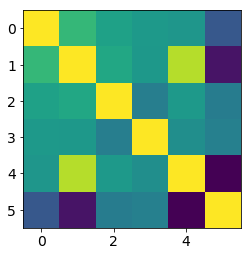

In [263]:
imshow(corr_mat)

In [264]:
eig(corr_mat)

(array([2.7496, 0.1264, 0.2521, 0.7337, 1.1256, 1.0125]),
 array([[-2.9982e-01, -2.3830e-01, -9.1569e-03, -7.4024e-01,  5.5225e-01,  1.7363e-02],
        [-5.5837e-01,  5.1289e-01, -6.4842e-01,  6.8702e-02, -5.2597e-04,  9.3203e-04],
        [-1.9642e-01,  4.5560e-02,  2.5388e-01,  4.5464e-01,  5.0596e-01,  6.5741e-01],
        [-1.1694e-01,  3.4960e-02,  1.6776e-01,  3.8591e-01,  4.9524e-01, -7.5018e-01],
        [-5.3677e-01, -7.4827e-01, -1.0282e-01,  2.5136e-01, -2.7819e-01, -2.8538e-02],
        [ 5.0788e-01, -3.4198e-01, -6.9014e-01,  1.6888e-01,  3.4113e-01,  6.2635e-02]]))

In [90]:
diffs = []
steps = logspace(-2, -5, 100)
for step in steps:
    H = Jacobian(func, step=step*array(scales), order=6)
    diffs.append(H(result1[0], ao._res_points[:,0], ao._res_points[:,1])[0])

6.9631e+09, 6.6624e+07, 2.9752e-04, 1.1576e-04, 1.1287e+10, 4.7992e-01 loss: 0.06 MHz


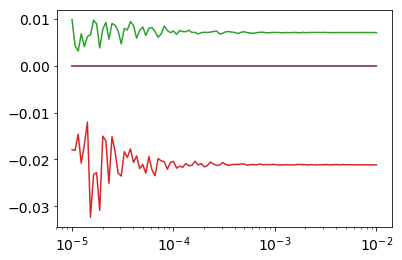

In [91]:
for i in range(0, 6):
     plot(steps, array(diffs).T[i])
# plt.ylim(-1e-3, 1e-3)
plt.xscale("log")

In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [333]:
diff(diff(Z(XX, YY)), axis=0).shape

(49, 49)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X,Y = linspace(-10, 10, 1000),linspace(-10, 10, 1000)
dx = X[1]-X[0]
dy = Y[1]-Y[0]

XX, YY = meshgrid(X,Y)

def Z(XX, YY):
    return (XX+5)**2+(YY+1)**2-XX*YY

# ax.plot_wireframe(XX, YY, ((Z(XX, YY))), rstride=10, cstride=10)


# ax.plot_wireframe(XX[:, :-1], YY[:, :-1], (diff(Z(XX, YY))), rstride=10, cstride=10)


ax.plot_wireframe(XX[:-1,:-1], YY[:-1,:-1], diff(diff(Z(XX, YY), axis=1)/dx/dy, axis=0),  rstride=100, cstride=100)
plt.show()

In [ ]:
ao0._result

In [ ]:
ao0._brute_opt_params, ao0._brute_loss

In [ ]:
ao0._opt_params, ao0._loss

In [ ]:
result2

In [62]:
rcParams['axes.formatter.offset_threshold'] = 5

'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


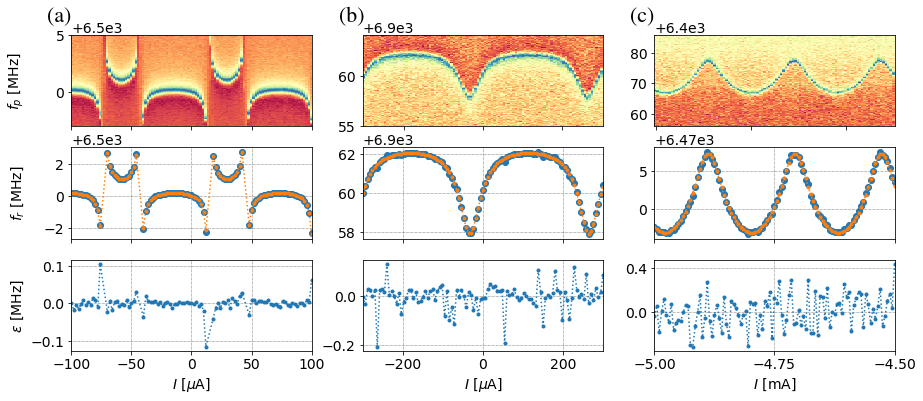

In [55]:
##### Data 0

plt.subplot2grid((3, 3), (0, 0), rowspan=1, colspan=1)

# x = (anti0._data["Current [A]"]-result0[0][3])/result0[0][2]
x = anti0._data["Current [A]"]
dx = x[1]-x[0]
x = concatenate((x-dx/2, [x[-1]+dx/2]))


pcolormesh(x/1e-6, anti0._data["frequency"]/1e6, abs(anti0._data["data"]).T, cmap="Spectral_r", rasterized=True)

# plt.xlim(-1,1)
plt.xlim(-100,100)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=50))
plt.gca().set_xticklabels([])


plt.ylabel("$f_p$ [MHz]")


plt.text(-0.1, 1.15, "(a)", fontdict={"name":"STIX"}, fontsize=22, transform=gca().transAxes)

###### Fit 0

plt.subplot2grid((3, 3), (1, 0), rowspan=1, colspan=1)

# x = (ao0._res_points[:,0]-result0[0][3])/result0[0][2]
x = ao0._res_points[:,0]


plot(x/1e-6, ao0._res_points[:,1]/1e6, marker="o", linestyle="", label="Extracted");
plot(x/1e-6, ao0._model_fast(ao0._res_points[:,0], ao0._opt_params)/1e6, marker=".", linestyle=":")

# plt.xlim(-1,1)
plt.xlim(-100,100)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=50))

plt.gca().set_xticklabels([])

plt.ylabel("$f_r$ [MHz]")


plt.grid()

########## Error 0
plt.subplot2grid((3, 3), (2, 0), rowspan=1, colspan=1)


plot(x/1e-6, ao0._res_points[:,1]/1e6 - ao0._model_fast(ao0._res_points[:,0], ao0._opt_params)/1e6,\
                 marker=".", linestyle=":", label="Extracted");

# plt.xlim(-1,1)
plt.xlim(-100,100)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=50))
plt.xlabel("$I$ [$\mu$A]")

plt.ylabel(r"$\varepsilon$ [MHz]")

plt.grid()

##### Data 1
plt.subplot2grid((3, 3), (0, 1), rowspan=1, colspan=1)

# x = (anti1._data["Current [A]"]-result1[0][3])/result1[0][2]

x = anti1._data["Current [A]"]
dx = x[1]-x[0]
x = concatenate((x-dx/2, [x[-1]+dx/2]))


pcolormesh(x, anti1._data["frequency"]/1e6, abs(anti1._data["data"]).T, cmap="Spectral_r", rasterized=True)

plt.gca().set_xticklabels([])

plt.text(-0.1, 1.15, "(b)", fontdict={"name":"STIX"}, fontsize=22, transform=gca().transAxes)

######### Fit 1
plt.subplot2grid((3, 3), (1, 1), rowspan=1, colspan=1)

# x = (ao._res_points[:,0]-result1[0][3])/result1[0][2]
x = ao._res_points[:,0]


plot(x, ao._res_points[:,1]/1e6, marker="o", linestyle="", label="Extracted");
plot(x, ao._model_fast(ao._res_points[:,0], ao._opt_params)/1e6, marker=".", linestyle=":")

plt.xlim(-300e-6, 300e-6)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.gca().set_xticklabels([])

# plt.ylabel("$f_r$ [MHz]")
# plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(1))



ax = gca().get_yaxis().get_major_formatter()
ax.set_useOffset(True)
plt.grid()

######## Error 1
plt.subplot2grid((3, 3), (2, 1), rowspan=1, colspan=1)


plot(x/1e-6, ao._res_points[:,1]/1e6 - ao._model_fast(ao._res_points[:,0], ao._opt_params)/1e6,\
                 marker=".", linestyle=":", label="Extracted");

plt.xlim(-300,300)
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.xlabel("$I$ [$\mu$A]")

# plt.ylabel(r"$\varepsilon$ [MHz]")

plt.grid()


##### Data 2
plt.subplot2grid((3, 3), (0, 2), rowspan=1, colspan=1)

# x = (anti2._data["Current [A]"]-result2[0][3])/result2[0][2]+26
x = anti2._data["Current [A]"]
dx = x[1]-x[0]
x = concatenate((x-dx/2, [x[-1]+dx/2]))

pcolormesh(x, anti2._data["frequency"]/1e6, abs(anti2._data["data"]).T, cmap="Spectral_r", rasterized=True)

plt.gca().set_xticklabels([])

plt.text(-0.1, 1.15, "(c)", fontdict={"name":"STIX"}, fontsize=22, transform=gca().transAxes)


######### Fit 2
plt.subplot2grid((3, 3), (1, 2), rowspan=1, colspan=1)

# x = (ao2._res_points[:,0]-result2[0][3])/result2[0][2]+26
x = (ao2._res_points[:,0])


plot(x/1e-3, ao2._res_points[:,1]/1e6, marker="o", linestyle="", label="Extracted");
plot(x/1e-3, ao2._model_fast(ao2._res_points[:,0], ao2._opt_params)/1e6, marker=".", linestyle=":")

plt.xlim(-5,-4.5)
plt.gca().set_xticklabels([])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(2))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))

# plt.ylabel("$f_r$ [MHz]")
# plt.ylim(6.5125, 6.514)
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=0.001))
ax = gca().get_yaxis().get_major_formatter()
ax.set_useOffset(True)


plt.grid()

######## Error 2
plt.subplot2grid((3, 3), (2, 2), rowspan=1, colspan=1)


plot(x/1e-3, ao2._res_points[:,1]/1e6 - ao2._model_fast(ao2._res_points[:,0], ao2._opt_params)/1e6,\
                 marker=".", linestyle=":", label="Extracted");

plt.xlim(-5,-4.5)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(2))
plt.xlabel("$I$ [mA]")

# plt.ylabel(r"$\varepsilon$ [MHz]")
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(2))


plt.grid()
gcf().set_size_inches(13,5.8)
plt.tight_layout(h_pad=-0.1, w_pad=-0.2)
plt.gcf().align_ylabels()
# plt.savefig("../Pictures/fit_cases.pdf", bbox_inches="tight")

In [752]:
500*500*4

1000000

In [748]:
a = random.random((500, 500))

In [749]:
import copy

In [750]:
%timeit copy.deepcopy(a)

406 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
ao._res_points[:,0]

In [56]:
anti = MeasurementResult.load("Xmon-043-3", "VI-anticrossing_fit-fail")
data_dict = anti.get_data()
# data_dict["data"] = data_dict["data"]*exp(2j*pi*65e-9*freqs) +\
#         1e-2*(random.normal(size = data_dict["data"].shape)\
#                         +1j*random.normal(size = data_dict["data"].shape))
# # data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)

# anti.set_data(data_dict)

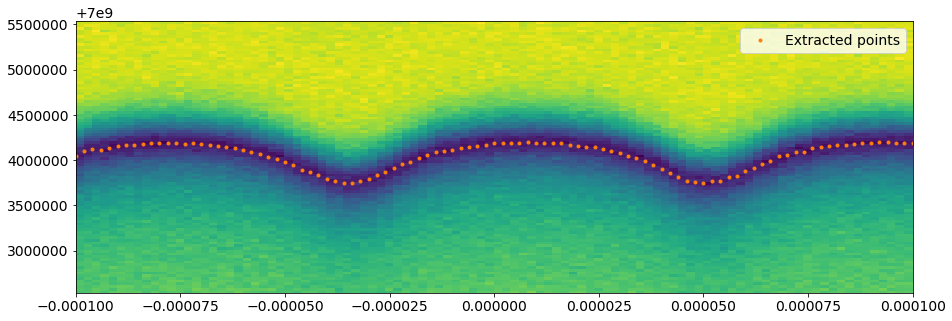

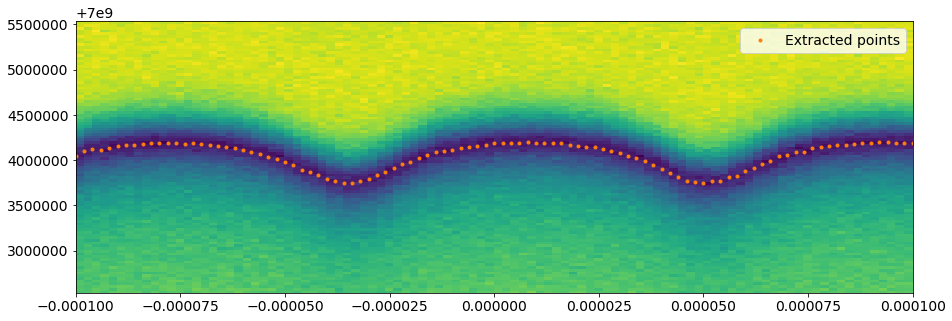

In [57]:
ao_above = AnticrossingOracle("transmon", anti, plot=True, hints=["fqmax_above"])
ao_below = AnticrossingOracle("transmon", anti, plot=True, hints=["fqmax_below"])

7.0046e+09, 4.9665e+07, 8.5554e-05, 7.6937e-06, 1.2828e+10, 5.9045e-01 loss: 0.01 MHz


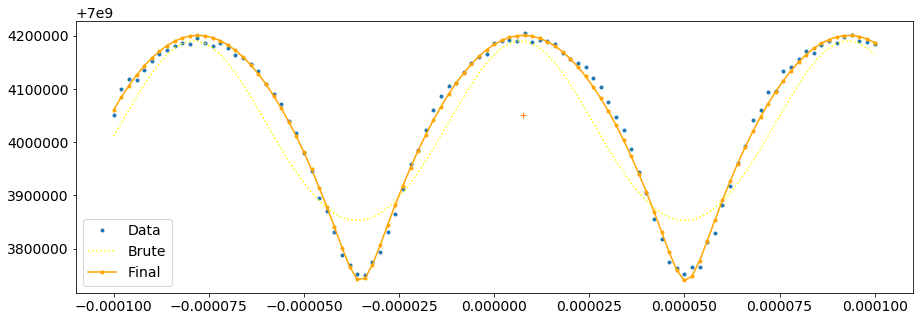

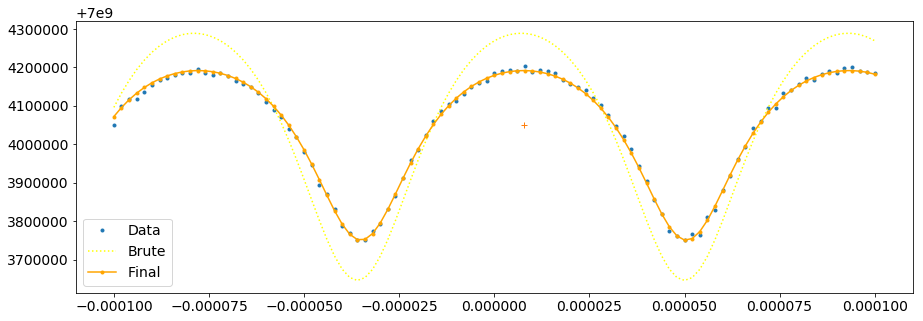

In [58]:
result_below = ao_below.launch()
result_above = ao_above.launch()

In [71]:
result_above, result_below

((array([7.0046e+09, 4.9665e+07, 8.5554e-05, 7.6937e-06, 1.2828e+10, 5.9045e-01]),
  0.006636811715380484),
 (array([ 7.0012e+09,  1.2740e+08,  8.5534e-05,  7.6616e-06,  1.5942e+09, -1.4699e-01]),
  0.010469452375252616))

In [79]:
rcParams['axes.formatter.offset_threshold'] = 2

'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


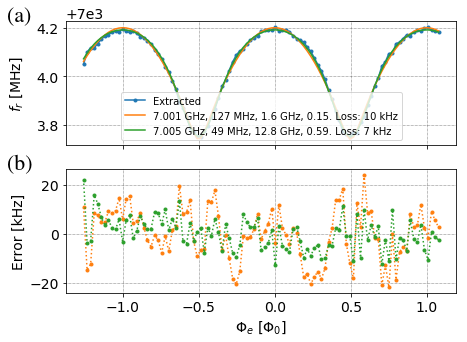

In [81]:
plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)

x = (ao_below._res_points[:,0]-result_above[0][3])/result_above[0][2]

plot(x, ao_below._res_points[:,1]/1e6, marker=".", linestyle="-", label="Extracted");
plot(x, ao_below._model_fast(ao_below._res_points[:,0],
     ao_below._opt_params)/1e6, linestyle="-", 
     label=r"7.001 GHz, 127 MHz, 1.6 GHz, 0.15. Loss: 10 kHz")

plot(x, ao_below._model_fast(ao_above._res_points[:,0],
     ao_above._opt_params)/1e6, linestyle="-",
     label=r"7.005 GHz, 49 MHz, 12.8 GHz, 0.59. Loss: 7 kHz")

plt.gca().set_xticklabels([])


plt.ylabel("$f_r$ [MHz]")
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=0.001))
# plt.ylim(7.003, 7.0045)

plt.grid()
plt.legend(fontsize=10, loc="lower center")

plt.text(-0.15, 1, "(a)", fontdict={"name":"STIX"}, fontsize=22, transform=gca().transAxes)


plt.subplot2grid((2, 1), (1, 0), rowspan=1, colspan=1)


plot(x, ao_below._model_fast(ao_below._res_points[:,0],
                             ao_below._opt_params)/1e3-ao_below._res_points[:,1]/1e3, "C1", 
                             marker=".", linestyle=":", label="")
plot(x, ao_below._model_fast(ao_above._res_points[:,0],
                             ao_above._opt_params)/1e3-ao_below._res_points[:,1]/1e3, "C2", 
                             marker=".", linestyle=":")

# plt.xlim(-.75,.75)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
# plt.gca().set_xticklabels([])

plt.ylabel("Error [kHz]")


plt.text(-0.15, 1, "(b)", fontdict={"name":"STIX"}, fontsize=22, transform=gca().transAxes)

plt.xlabel("$\Phi_e$ [$\Phi_0$]")


plt.grid()
plt.gcf().set_size_inches(7,5)
plt.gcf().align_ylabels()
plt.savefig("../Pictures/alternative_fits.pdf", bbox_inches="tight")